### 1. Rolx algorithm
Feature Extraction : external_edges(mean)(mean), degree(mean),  degree(sum)

Classifiers:  logistic regression


In [165]:
#import necessary libraries

import warnings
from pprint import pprint

import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

from graphrole import RecursiveFeatureExtractor, RoleExtractor

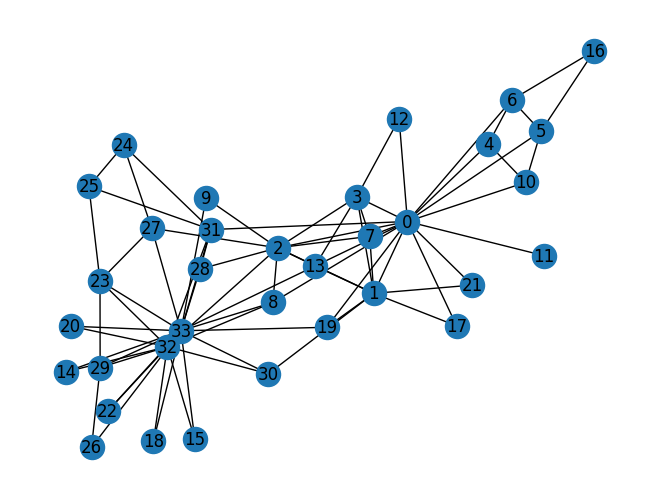

In [166]:
#Load graph data from edgelist file
G = nx.read_edgelist('./data/karate_edgelist.txt')
nx.draw(G, with_labels = True)

plt.show()

In [167]:
# extract features from 1 recursive generations:
feature_extractor = RecursiveFeatureExtractor(G)
features = feature_extractor.extract_features()

print(f'\nFeatures extracted from {feature_extractor.generation_count} recursive generations:')
print(features)


Features extracted from 3 recursive generations:
    external_edges(mean)(mean)  degree(mean)  degree(sum)  \
0                    19.001736      4.250000         68.0   
1                    21.199074      5.666667         51.0   
10                   17.763889      7.666667         23.0   
11                   24.875000     16.000000         16.0   
12                   25.020833     11.000000         22.0   
13                   26.732516     11.600000         58.0   
14                   29.046569     14.500000         29.0   
15                   29.046569     14.500000         29.0   
16                   12.750000      4.000000          8.0   
17                   26.159722     12.500000         25.0   
18                   29.046569     14.500000         29.0   
19                   27.165305     14.000000         42.0   
2                    24.965278      6.500000         65.0   
20                   29.046569     14.500000         29.0   
21                   26.159722     

In [168]:
# assign node roles
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles = role_extractor.roles

print('\nNode role assignments:')
pprint(node_roles)

print('\nNode role membership by percentage:')
print(role_extractor.role_percentage.round(2))


Node role assignments:
{'0': 'role_3',
 '1': 'role_5',
 '10': 'role_1',
 '11': 'role_1',
 '12': 'role_1',
 '13': 'role_2',
 '14': 'role_1',
 '15': 'role_1',
 '16': 'role_0',
 '17': 'role_1',
 '18': 'role_1',
 '19': 'role_2',
 '2': 'role_2',
 '20': 'role_1',
 '21': 'role_1',
 '22': 'role_1',
 '23': 'role_2',
 '24': 'role_4',
 '25': 'role_0',
 '26': 'role_1',
 '27': 'role_2',
 '28': 'role_1',
 '29': 'role_5',
 '3': 'role_0',
 '30': 'role_2',
 '31': 'role_2',
 '32': 'role_0',
 '33': 'role_3',
 '4': 'role_1',
 '5': 'role_3',
 '6': 'role_3',
 '7': 'role_1',
 '8': 'role_2',
 '9': 'role_1'}

Node role membership by percentage:
    role_0  role_1  role_2  role_3  role_4  role_5
0     0.41    0.00    0.00    0.58    0.00    0.00
1     0.28    0.08    0.08    0.00    0.03    0.52
10    0.08    0.49    0.08    0.33    0.01    0.01
11    0.01    0.89    0.01    0.08    0.01    0.01
12    0.01    0.52    0.01    0.06    0.15    0.25
13    0.13    0.08    0.52    0.00    0.13    0.13
14    0.01    

In [169]:
# build color palette for plotting
unique_roles = sorted(set(node_roles.values()))
color_map = sns.color_palette('Paired', n_colors=len(unique_roles))
# map roles to colors
role_colors = {role: color_map[i] for i, role in enumerate(unique_roles)}
# build list of colors for all nodes in G
node_colors = [role_colors[node_roles[node]] for node in G.nodes]

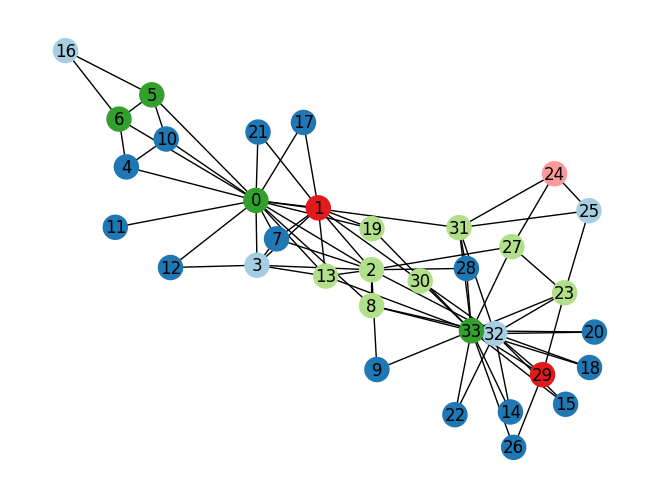

In [170]:
# plot graph
plt.figure()

with warnings.catch_warnings():
    # catch matplotlib deprecation warning
    warnings.simplefilter('ignore')
    nx.draw(
        G,
        pos=nx.spring_layout(G, seed=42),
        with_labels=True,
        node_color=node_colors,
    )

plt.show()


### 2. Learning with Local and Global Consistency

Learning from labeled and unlabeled data.

#### Testing small graph

In [171]:
#Draw graphs with different labeled nodes
def draw_graph(G):
    clubs = []  # list to populate with labels
    for n in G.nodes:
        c = G.nodes[n]['label']
        col = 0
        if c=='A':
            clubs.append('green')
        elif c =='B':
            clubs.append('red')
        else:
            clubs.append('gray')
    pos = nx.spring_layout(G, seed=42) # To be able to recreate the graph layout
    nx.draw_networkx(G, pos=pos, node_color = clubs) # Plot the graph

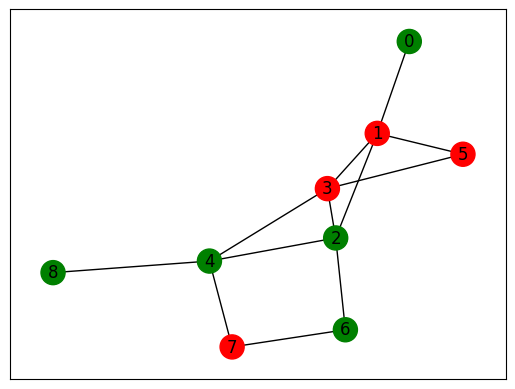

In [172]:
def fill_labels(G):
    for i in range(len(G.nodes)):
        if i%2 ==0:
            G.nodes[i]['label'] = 'A'
        else:
            G.nodes[i]['label'] = 'B'
from networkx.algorithms import node_classification
G = nx.Graph()
G = nx.read_edgelist('./data/edge_list.txt')
mapping = {}
for i in G.nodes:
    mapping[f"{i}"] = int(i)
G = nx.relabel_nodes(G, mapping)

fill_labels(G)
#plt.show()
#nx.draw(G, with_labels=True)
draw_graph(G)

#### Setting unlabeled nodes by using unlabel_set

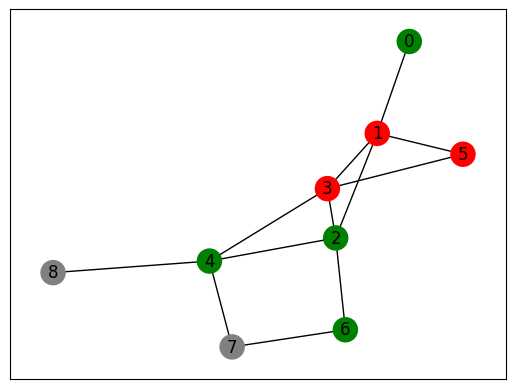

In [173]:
# Lets hide labels of nodes 7 and 8
unlabel_set = [7,8]
for n in unlabel_set:
   G.nodes[n]['label'] = ''
draw_graph(G)

#### Predict label of nodes

In [174]:
predicted = node_classification.local_and_global_consistency(G)
predicted

['A', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'A']

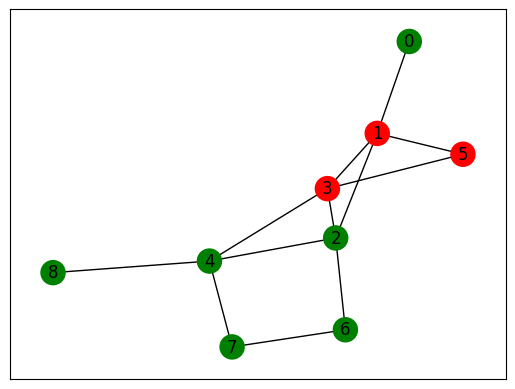

In [175]:
for i in range(len(G.nodes)):
    if G.nodes[i]['label']=='':
        G.nodes[i]['label']= predicted[i]

draw_graph(G)

#### Testing Karate graph

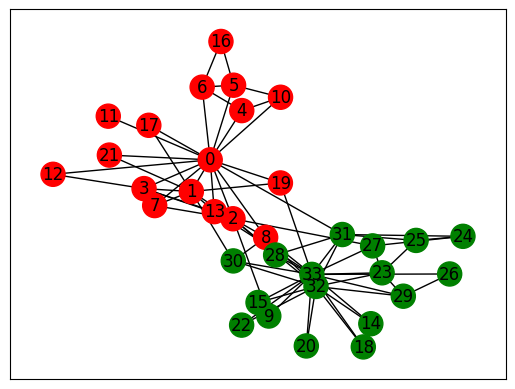

In [194]:
#visualize karate graph
G = nx.karate_club_graph()  # load data
draw_graph_1(G)

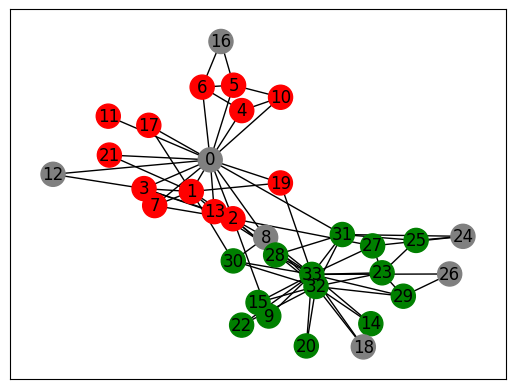

In [195]:
#Lets hide several node labels
unlabel_set = [0,12,16,18,26,24,8]


for n in unlabel_set:
    G.nodes[n]['club'] = ''
draw_graph_1(G)

In [196]:
# 
#local_and_global_consistency(G, alpha=0.99, max_iter=30, label_name='label')

predicted = node_classification.local_and_global_consistency(G,label_name='club')


for i in range(len(G.nodes)):
    if G.nodes[i]['club']=='':
        G.nodes[i]['club']= predicted[i]




In [197]:
#Draw graph with different labeled nodes, different colours
def draw_graph_1(G):
    clubs = []  # list to populate with labels
    for n in G.nodes:
        c = G.nodes[n]['club']
        col = 0
        if c=='Officer':
            clubs.append('green')
        elif c =='Mr. Hi':
            clubs.append('red')
        else:
            clubs.append('gray')
    pos = nx.spring_layout(G, seed=42) # To be able to recreate the graph layout
    nx.draw_networkx(G, pos=pos, node_color = clubs) # Plot the graph
    

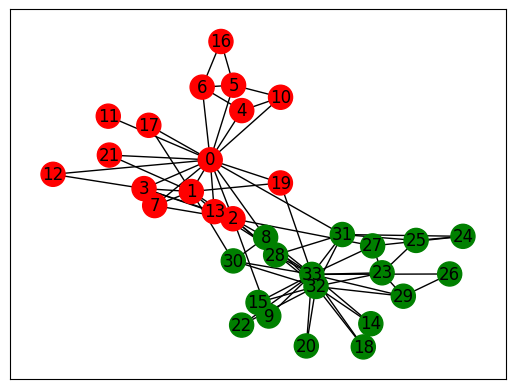

In [198]:
draw_graph_1(G)

### 3. Label propagation 

In [176]:
# Import libraries
import pandas as pd #For reading dataset files
import networkx as nx #For network creation/analysis
from networkx.algorithms import community
import community as community_louvain
import matplotlib.pyplot as plt #For plotting graphs
import igraph as ig
%matplotlib inline

#### Load karate graph from library

In [187]:
G = nx.karate_club_graph()

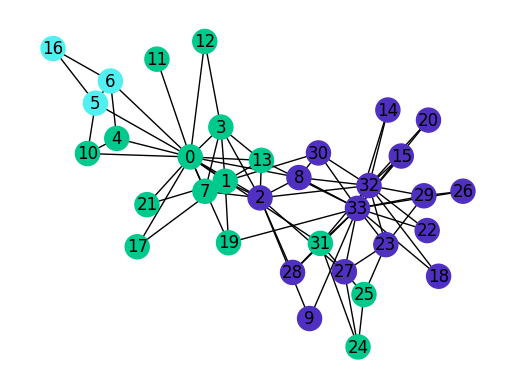

In [189]:
colors = ["#00C98D", "#5030C0", "#50F0F0"]
pos = nx.spring_layout(G)
lst_m = community.label_propagation_communities(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for c in lst_m:
    for n in c:
        color_map_b[n] = colors[counter]
    counter = counter + 1
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

In [190]:
#Draw graph with different labeled nodes, different colours
def draw_graph_1(G):
    clubs = []  # list to populate with labels
    for n in G.nodes:
        c = G.nodes[n]['club']
        col = 0
        if c=='Officer':
            clubs.append('green')
        elif c =='Mr. Hi':
            clubs.append('red')
        else:
            clubs.append('gray')
    pos = nx.spring_layout(G, seed=42) # To be able to recreate the graph layout
    nx.draw_networkx(G, pos=pos, node_color = clubs) # Plot the graph
    

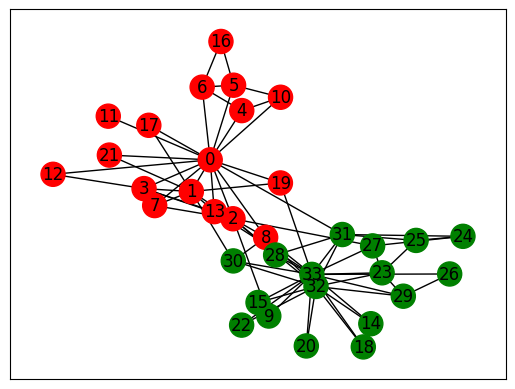

In [191]:
#visualize karate graph
G = nx.karate_club_graph()  # load data
draw_graph_1(G)

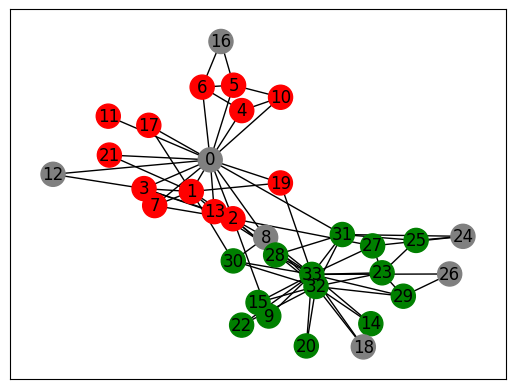

In [192]:
#Lets hide several node labels
unlabel_set = [0,12,16,18,26,24,8]


for n in unlabel_set:
    G.nodes[n]['club'] = ''
draw_graph_1(G)

In [193]:
# 

#local_and_global_consistency(G, alpha=0.99, max_iter=30, label_name='label')

predicted = node_classification.local_and_global_consistency(G,label_name='club')


for i in range(len(G.nodes)):
    if G.nodes[i]['club']=='':
        G.nodes[i]['club']= predicted[i]




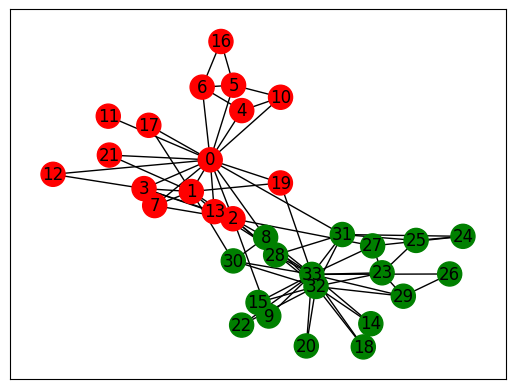

In [183]:
draw_graph_1(G)